In [93]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [94]:
all_df = pd.read_csv("data/star.csv")

In [95]:
X=all_df.drop(['target_class'], axis=1).values.astype('float64')

In [96]:
Y = all_df['target_class'].values.astype('int64')

In [97]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

14318

In [98]:
test_Features[:2]

array([[-0.17610439, -0.03233402, -0.03304459, -0.30800098,  2.72763109,
         3.42581353, -1.8008325 , -1.00060536],
       [-1.89957861, -1.28100252,  2.39730283,  1.79667065,  0.98835635,
         2.27972835, -1.4693661 , -0.96845994]])

In [99]:
train_Label[:4]

array([0, 0, 0, 0])

In [100]:
train_Features.shape

(14318, 8)

In [101]:
test_Label[:4]

array([0, 1, 0, 0])

In [102]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [103]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [104]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [105]:
model = Sequential()

In [106]:
model.add(SimpleRNN(units=8, input_shape=(8,1)))

In [107]:
model.add(Dense(1, activation = "sigmoid"))

In [108]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 8)                 80        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [110]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 12886 samples, validate on 1432 samples
Epoch 1/30
12886/12886 [==============================] - 1s 73us/step - loss: 0.8800 - acc: 0.2453 - val_loss: 0.8397 - val_acc: 0.2493
Epoch 2/30
12886/12886 [==============================] - 0s 14us/step - loss: 0.8152 - acc: 0.2635 - val_loss: 0.7787 - val_acc: 0.2696
Epoch 3/30
12886/12886 [==============================] - 0s 13us/step - loss: 0.7553 - acc: 0.2977 - val_loss: 0.7222 - val_acc: 0.3247
Epoch 4/30
12886/12886 [==============================] - 0s 14us/step - loss: 0.6998 - acc: 0.4415 - val_loss: 0.6695 - val_acc: 0.6453
Epoch 5/30
12886/12886 [==============================] - 0s 20us/step - loss: 0.6481 - acc: 0.7292 - val_loss: 0.6205 - val_acc: 0.7744
Epoch 6/30
12886/12886 [==============================] - 0s 11us/step - loss: 0.5999 - acc: 0.8086 - val_loss: 0.5748 - val_acc: 0.8352
Epoch 7/30
12886/12886 [==============================] - 0s 15us/step - loss: 0.5547 - acc: 0.8508 - val_loss: 0.5321 - val_acc:

In [111]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

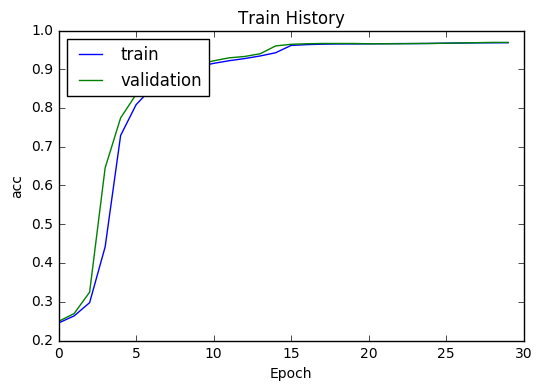

In [112]:
show_train_history(train_history,'acc','val_acc')

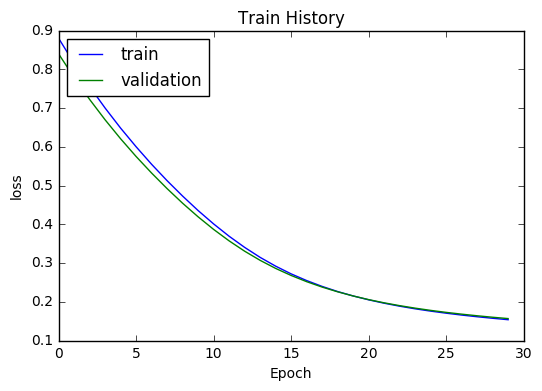

In [113]:
show_train_history(train_history,'loss','val_loss')

In [114]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3580/3580 [==============================] - 0s 83us/step


In [115]:
scores[1]

0.971508379688476